# Part two
(In this part you have chance to work on your own data and thus have free choice of topic)

# Monthly Electricity Production in GWh [2010-2022]
International Energy Agency (IEA)

The data includes information about energy production in various countries on a monthly basis from 2010 to 2022. The energy production is measured in gigawatt-hours (GWh) and covers a range of energy products including hydro, wind, solar, geothermal, nuclear, fossil fuels, and others.

Selected dataset : https://www.kaggle.com/datasets/ccanb23/iea-monthly-electricity-statistics

The dataset columns include:
* COUNTRY: Name of the country
* CODE_TIME: A code that represents the month and year (e.g., JAN2010 for January 2010)
* TIME: The month and year in a more human-readable format (e.g., January 2010)
* YEAR: The year of the data point
* MONTH: The month of the data point as a number (1-12)
* MONTH_NAME: The month of the data point as a string (e.g., January)
* PRODUCT: The type of energy product -
Hydro, Wind, Solar, Geothermal, Other renewables, Nuclear, Total combustible fuels, Coal, Oil, Natural gas, Combustible renewables, Other combustible non-renewables, Not specified, Net electricity production, Total imports, Total exports, Electricity supplied, Used for pumped storage, Distribution losses, Final consumption, Electricity trade, Renewables, Non-renewables, Others, Other renewables aggregated, Low carbon, Fossil fuels
* VALUE: The amount of electricity generated in gigawatt-hours (GWh)
* DISPLAY_ORDER: The order in which the products should be displayed
* yearToDate: The amount of electricity generated for the current year up to the current month in GWh
* previousYearToDate: The amount of electricity generated for the previous year up to the current month in GWh
* share: The share of the product in the total electricity generation for the country in decimal format


In [1]:
import scipy.stats as stats
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
#path = kagglehub.dataset_download("ccanb23/iea-monthly-electricity-statistics")
#print("Path to dataset files:", path)


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\ccanb23\iea-monthly-electricity-statistics\versions\1


In [46]:
df = pd.read_csv("data_monthly_electricity_production_in_gwh.csv")
df

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,1,1.647189e+04,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,2,4.940909e+03,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,3,9.082380e+02,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,4,9.960000e-01,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,7,2.143030e+05,NaN,0.930108
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168


features: 'COUNTRY', 'CODE_TIME', 'TIME', 'YEAR', 'MONTH', 'MONTH_NAME', 'PRODUCT', 'VALUE', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate','share'

## Exercise 2.1 Descriptive statistics analysis for at least two qualitative and quantitative variables

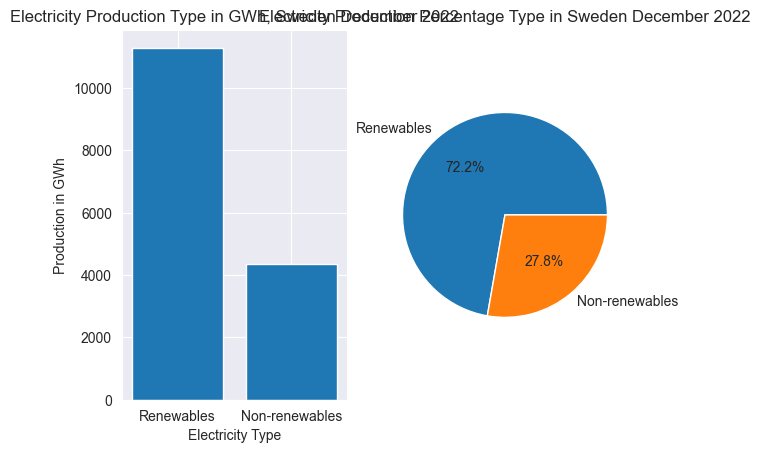

In [69]:
# features: 'COUNTRY', 'CODE_TIME', 'TIME', 'YEAR', 'MONTH', 'MONTH_NAME', 'PRODUCT', 'VALUE', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate','share'
df_sweden_dec2022 = df[(df['COUNTRY'] == 'Sweden') & (df['YEAR'] == 2022) & (df['MONTH']==12)].drop(columns=['COUNTRY']).dropna()

plt.subplot(1, 2, 1)
plt.bar(['Renewables', 'Non-renewables'], df_sweden_dec2022.loc[df_sweden_dec2022['PRODUCT'].isin(['Renewables', 'Non-renewables']), 'VALUE'])
plt.title('Electricity Production Type in GWh, Sweden December 2022')
plt.xlabel('Electricity Type')
plt.ylabel('Production in GWh')

plt.subplot(1, 2, 2)
plt.pie(df_sweden_dec2022.loc[df_sweden_dec2022['PRODUCT'].isin(['Renewables', 'Non-renewables']), 'VALUE'], labels=['Renewables', 'Non-renewables'],autopct='%1.1f%%')
plt.title("Electricity Production Percentage Type in Sweden December 2022")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

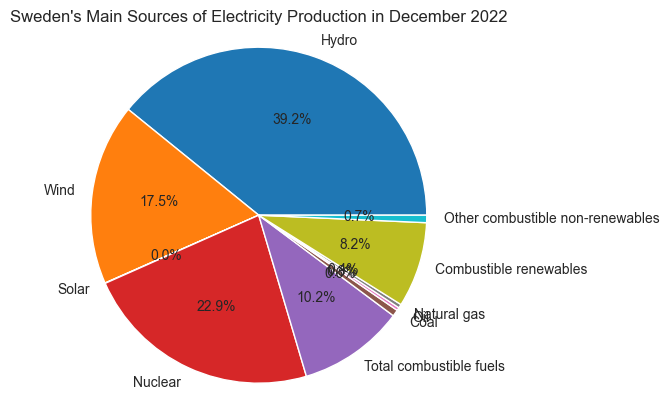

In [72]:
#Hydro, Wind, Solar, Geothermal, Other renewables, Nuclear, Total combustible fuels, Coal, Oil, Natural gas, Combustible renewables, Other combustible non-renewables, Not specified,
df_main_esources_dec = df_sweden_dec2022[(df_sweden_dec2022['PRODUCT'].isin(['Hydro', 'Wind', 'Solar', 'Geothermal', 'Other renewables', 'Nuclear', 'Total combustible fuels', 'Coal', 'Oil', 'Natural gas','Combustible renewables', 'Other combustible non-renewables', 'Not specified']))]

plt.pie(df_main_esources_dec['VALUE'], labels=df_main_esources_dec['PRODUCT'],autopct='%1.1f%%')
plt.title("Sweden's Main Sources of Electricity Production in December 2022")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Statistical Analysis Overview of Global Renewable Electricity Production
count      6708.000000
mean      20516.414842
std       49859.644224
min           7.072000
25%         870.881502
50%        2917.998436
75%       10532.265000
max      312682.644057
Name: VALUE, dtype: float64

Statistical Analysis Overview of Global Non-renewables Electricity Production
count      6708.000000
mean      57168.080602
std      143216.578685
min           0.018307
25%        1103.231750
50%        4466.007289
75%       20573.240750
max      792436.754000
Name: VALUE, dtype: float64


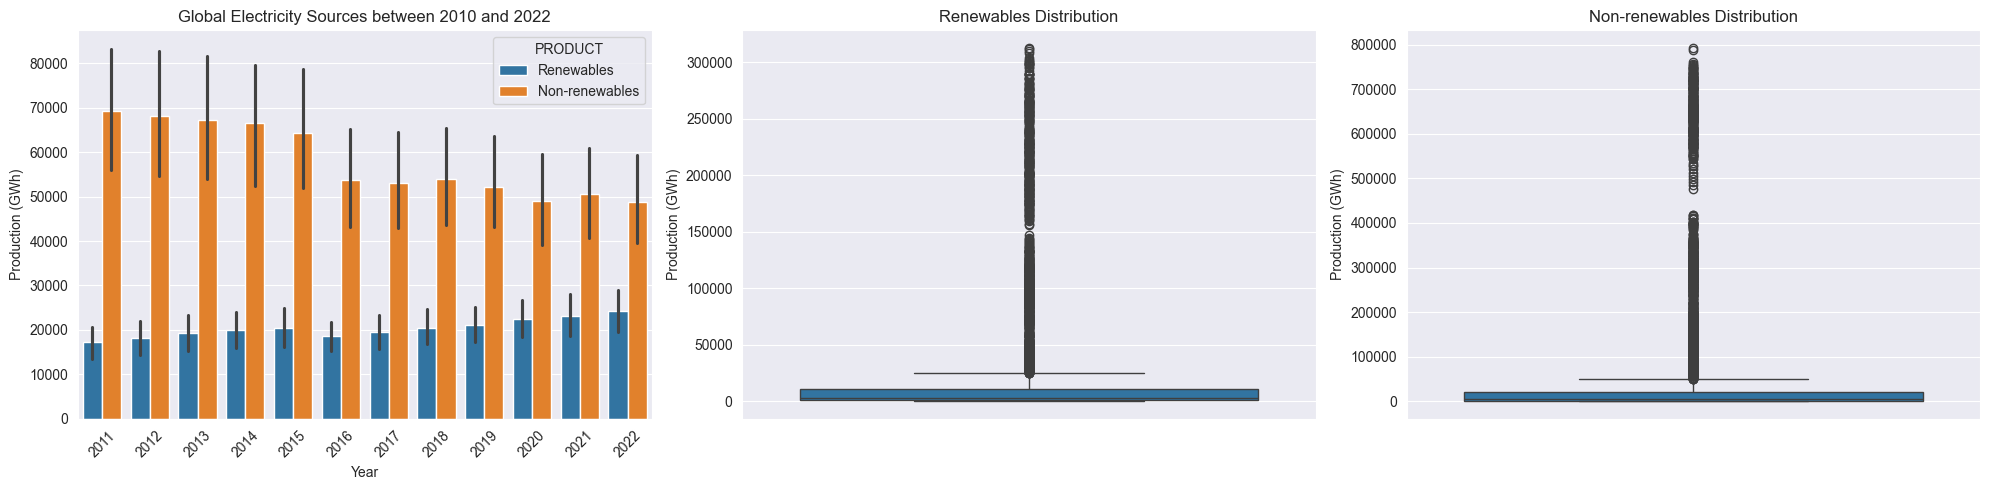

In [103]:
df_etype = df[df['PRODUCT'].isin(['Renewables', 'Non-renewables'])].dropna()

df_renewables = df_etype[df_etype['PRODUCT']=='Renewables']['VALUE']
df_non_renewables = df_etype[df_etype['PRODUCT']=='Non-renewables']['VALUE']

print("Statistical Analysis Overview of Global Renewable Electricity Production")
print(df_renewables.describe())
print("\nStatistical Analysis Overview of Global Non-renewables Electricity Production")
print(df_non_renewables.describe())

# Stretched horizontally
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Increase first number for more width

# Bar plot
sns.barplot(x='YEAR', y='VALUE', hue='PRODUCT', data=df_etype, ax=axes[0])
axes[0].set_title('Global Electricity Sources between 2010 and 2022')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Production (GWh)')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for renewables
sns.boxplot(y=df_renewables, ax=axes[1])
axes[1].set_title('Renewables Distribution')
axes[1].set_ylabel('Production (GWh)')

# Boxplot for non-renewables
sns.boxplot(y=df_non_renewables, ax=axes[2])
axes[2].set_title('Non-renewables Distribution')
axes[2].set_ylabel('Production (GWh)')

plt.tight_layout()
plt.show()

Electricity Production - Five number summary
count      7332.000000
mean      77042.326254
std      190016.864766
min          39.981000
25%        2653.824000
50%        7259.234146
75%       40753.481000
max      999839.981667
Name: VALUE, dtype: float64


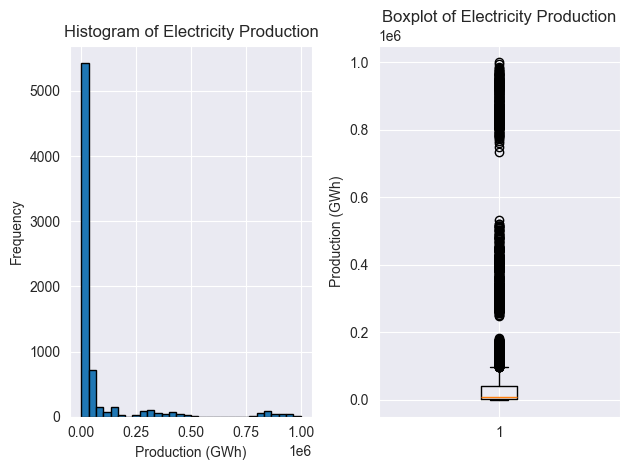

In [93]:
df_prod = df[df['PRODUCT']=='Net electricity production']
print('Electricity Production - Five number summary')
print(df_prod['VALUE'].describe())
#sns.histplot(df_prod['VALUE']).set_title('Global Electricity Production in GWh Boxplot')
# Visualizations
plt.subplot(1, 2, 1)
# 1. Histogram
plt.hist(df_prod['VALUE'], bins=30, edgecolor='black')
plt.title('Histogram of Electricity Production')
plt.xlabel('Production (GWh)')
plt.ylabel('Frequency')

# 2. Box plot
plt.subplot(1, 2, 2)
plt.boxplot(df_prod['VALUE'])
plt.title('Boxplot of Electricity Production')
plt.ylabel('Production (GWh)')

plt.tight_layout()
plt.show()

## Exercise 2.2 Confidence interval for one quantitative variable; Confidence interval for difference between two groups.

## Exercise 2.3 Carry out a T-test to check if the difference in characteristics between two groups is significant, or conduct an ANOVA to see if all groups have the same mean value in some characteristics.

## Exercise 2.4 Non-parametric test for same variable as in 3) and even compare the conclusion(s) with ANOVA

## Exercise 2.5 Correlation analysis, thereafter, identify the strongest correlation and statistically not significant relation(s)


## Exercise 2.6 Make a linear multiple regression analysis.